## Importation des Bibliothèques

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import mne

## Définition des variables

In [13]:
Fe=200
dt=1/Fe
t = np.arange(1000)*dt

In [5]:
# Signal en somme de sinus

x = np.sin(2*np.pi*2*t) + np.sin(2*np.pi*5*t)

In [15]:
# Signal représentant du bruit blanc

mean = 0
std = 1 
num_samples = 1000
x = np.random.normal(mean, std, size=num_samples)

In [7]:
# Importation d'un Signal EEG

file_path = "/Users/ewen/mne_data/physionet-sleep-data/SC4011EH-Hypnogram.edf"          # Charger un fichier EEG au format EDF
raw = mne.io.read_raw_edf(file_path, preload=True)

print(raw.info)                                      # Afficher des informations sur le signal

data, times = raw[:]                                 # Accéder aux données sous forme de numpy array

print("Données EEG :", data)                         # Afficher les premières valeurs
print("Temps :", times)


Extracting EDF parameters from /Users/ewen/mne_data/physionet-sleep-data/SC4011EH-Hypnogram.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/zn/0l3z8h9s5nd7wx__s1kwnz3r0000gq/T/ipykernel_2526/365409192.py:4: RuntimeWarning: Header information is incorrect for record length. Default record length set to 1.
It is possible that this file only contains annotations and no signals. In that case, please use mne.read_annotations() to load these annotations.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Reading 0 ... 1691  =      0.000 ...     0.999 secs...
<Info | 6 non-empty values
 bads: []
 ch_names: []
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 846.0 Hz
 meas_date: 1989-03-29 16:49:00 UTC
 nchan: 0
 projs: []
 sfreq: 1692.0 Hz
 subject_info: <subject_info | his_id: X, sex: 2, first_name: Female, last_name: 33yr>
>


/var/folders/zn/0l3z8h9s5nd7wx__s1kwnz3r0000gq/T/ipykernel_2526/365409192.py:4: RuntimeWarning: Omitted 125 annotation(s) that were outside data range.
  raw = mne.io.read_raw_edf(file_path, preload=True)
/var/folders/zn/0l3z8h9s5nd7wx__s1kwnz3r0000gq/T/ipykernel_2526/365409192.py:4: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(file_path, preload=True)


ValueError: No appropriate channels found for the given picks (slice(None, None, None))

## Calcul de la fréquence et transformation dans le domaine de Fourrier

In [17]:
sp = np.fft.fft(x)
freq = np.fft.fftfreq(x.size,dt)

## Définition des fonctions

In [19]:
#Fonction : Filtre passe bas de fréquence de coupure fcoup

def passe_bas(fcoup):
    filtre=[0]*len(freq)
    for i in range(0,len(freq)//2):
        if freq[i]<=fcoup:
            filtre[i]=1
    return filtre

In [21]:
# Fonction d'affichage des coubres

def affiches_courbes(Signals):
    for i in range(len(Signals)):
        plt.subplot(len(Signals),1,i+1)                                      # Positionne la coubre en ième position sur le plot
        plt.plot(Signals[i]["abscisse"],Signals[i]["signal"])                # Assigne à la coubre une plage de donnée en abscisse et une en ordonnée
        plt.xlim(Signals[i]["borne_inf"],Signals[i]["borne_sup"])   
        plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0.5)# Définie les limites de la plage en abscisse
    plt.show()

In [23]:
# Fonction effectuant le traitement du signal et retournant une liste avec le signal dans toutes ses étapes

def traitement_signal(signal, fcoup):
    Signals=[]
    Signal = {"signal" : signal, "abscisse" : t, "borne_inf" : 0, "borne_sup" : None}
    fft = {"signal" : np.abs(np.fft.fft(signal.real)), "abscisse" : np.fft.fftfreq(signal.size,dt), "borne_inf" : 0, "borne_sup" : 200}
    Filtre = {"signal" : passe_bas(fcoup), "abscisse" : np.fft.fftfreq(signal.size,dt), "borne_inf" : 0, "borne_sup" : 100}
    Fft_filtré = {"signal" : np.abs((signal*passe_bas(fcoup)).real), "abscisse" : np.fft.fftfreq(signal.size,dt), "borne_inf" : 0, "borne_sup" : 200}
    Signal_filtré = {"signal" : np.fft.ifft((sp*passe_bas(fcoup))), "abscisse" : np.fft.fftfreq(signal.size,dt), "borne_inf" : 0, "borne_sup" : None}
    Signals.append(Signal)
    Signals.append(fft)
    Signals.append(Filtre)
    Signals.append(Fft_filtré)
    Signals.append(Signal_filtré)

    affiches_courbes(Signals)

## Traitement du signal 

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


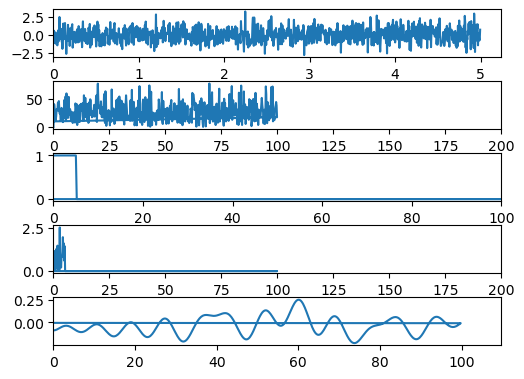

In [25]:
traitement_signal(x,5)